# Data Dictionary

1. `image_path`: Path to the image file from the dataset <br>
2. `mall_name`: 	Ground truth label indicating the mall the image belongs to
3. `date`: 	Date when the image was captured

# Data Exporting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as label_encoder
from sklearn.preprocessing import label_binarize

In [3]:
main_folder = '/content/drive/MyDrive/Colab Notebooks/TPR_Project/1C_Group2_Data'

In [4]:
# Define the main dataset folder
os.chdir(main_folder)

In [5]:
# Manually map each folder name to the mall name
mall_mapping = {
    "aeon_ayerkeroh": "Aeon Ayer Keroh",
    "melaka_mall": "Melaka Mall",
    "mydin": "Mydin"
}

# Store image paths and mall labels
data = []

# Iterate through mall folders
for folder, mall_name in mall_mapping.items():
    folder_path = os.path.join(main_folder, folder)

    if os.path.exists(folder_path):  # Ensure folder exists
        for image_name in sorted(os.listdir(folder_path)):
            image_path = os.path.join(folder, image_name)  # Relative path
            date = image_name.split("_")[0]  # Extract date from filename
            data.append([image_path, mall_name, date])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["image_path", "mall_name", "date"])

# Save as CSV in the main dataset folder
csv_path = os.path.join(main_folder, "mall_images.csv")
df.to_csv(csv_path, index=False)

print("CSV created successfully at:", csv_path)

CSV created successfully at: /content/drive/MyDrive/Colab Notebooks/TPR_Project/1C_Group2_Data/mall_images.csv


# Data Splitting

In [6]:
# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TPR_Project/1C_Group2_Data/mall_images.csv")

# Check the first few entries
print(df.head())

                      image_path        mall_name   date
0  aeon_ayerkeroh/16Apr_0002.jpg  Aeon Ayer Keroh  16Apr
1  aeon_ayerkeroh/16Apr_0004.jpg  Aeon Ayer Keroh  16Apr
2  aeon_ayerkeroh/16Apr_0007.jpg  Aeon Ayer Keroh  16Apr
3  aeon_ayerkeroh/16Apr_0008.jpg  Aeon Ayer Keroh  16Apr
4  aeon_ayerkeroh/16Apr_0017.jpg  Aeon Ayer Keroh  16Apr


In [7]:
from sklearn.model_selection import train_test_split

# Split dataset into 60% training and 40% testing
train_df, test_df = train_test_split(df, test_size=0.4, stratify=df["mall_name"], random_state=42)

# Save train and test CSVs for future use
train_df.to_csv("/content/drive/MyDrive/Colab Notebooks/TPR_Project/1C_Group2_Data/train_data.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Colab Notebooks/TPR_Project/1C_Group2_Data/test_data.csv", index=False)

print("Train and test data successfully created!")

Train and test data successfully created!


**ANIS TAMBAH SEBAB FILE PATH LAINNN**

In [8]:
#from sklearn.model_selection import train_test_split

# Split dataset into 60% training and 40% testing
#train_df, test_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df["mall_name"])

# Save train and test CSVs for future use
#train_df.to_csv("/content/drive/MyDrive/TPR_Project/1C_Group2_Data/train_data.csv", index=False)
#test_df.to_csv("/content/drive/MyDrive/TPR_Project/1C_Group2_Data/test_data.csv", index=False)

#print("Train and test data successfully created!")

-----------------------------------------

In [9]:
print("Train set:")
print(train_df["mall_name"].value_counts())

print("\nTest set:")
print(test_df["mall_name"].value_counts())

Train set:
mall_name
Aeon Ayer Keroh    61
Mydin              60
Melaka Mall        30
Name: count, dtype: int64

Test set:
mall_name
Aeon Ayer Keroh    41
Mydin              40
Melaka Mall        20
Name: count, dtype: int64


In [10]:
mall = train_df['mall_name'].unique().tolist()
print(mall)

['Aeon Ayer Keroh', 'Mydin', 'Melaka Mall']


In [11]:
#list all qualitative data
qualitative_attributes = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Qualitative (categorical) attributes:", qualitative_attributes)

Qualitative (categorical) attributes: ['image_path', 'mall_name', 'date']


Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
# Store encoders and mappings for each column

le = LabelEncoder()
train_df['mall_name_encoded'] = le.fit_transform(train_df['mall_name'])
test_df['mall_name_encoded'] = le.transform(test_df['mall_name'])

In [13]:
mapping_dict = {index: label for index, label in enumerate(le.classes_)}

all_mappings = {'mall_name': mapping_dict}

for col, mapping in all_mappings.items():
  print(f"{col}: {mapping}")

mall_name: {0: 'Aeon Ayer Keroh', 1: 'Melaka Mall', 2: 'Mydin'}


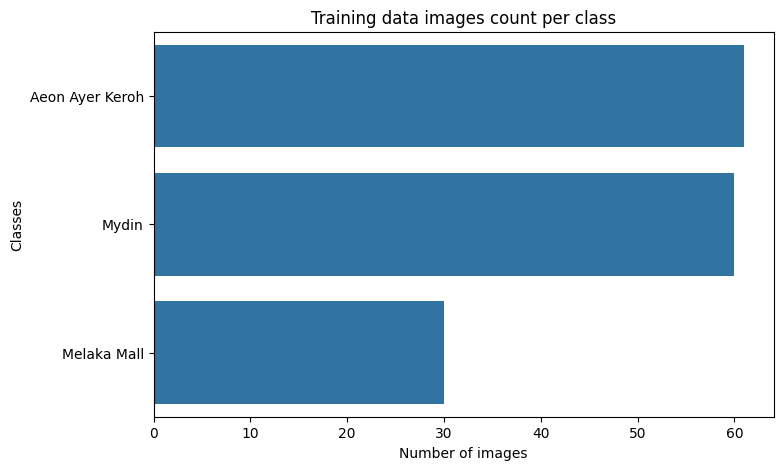

In [14]:
# Create a bar plot showing the count of training images per class
plt.figure(figsize=(8,5))
plt.title("Training data images count per class")
plt.xlabel('Number of images')
plt.ylabel('Classes')

# Calculate the counts of images per mall in the training set
nums_train = train_df["mall_name"].value_counts()

keys=list(nums_train.keys())
vals=list(nums_train.values)
sns.barplot(y=keys,x=vals)
plt.show() # Add plt.show() to display the plot

# Data Preprocessing

**Segment and Display Mall Images**

In [15]:
# create a function to display images
def image_grid(D,H,W,cols=10,scale=1, channels=3): # D: data, H: height, W: width
    # from 103404 columns to 10 columns with 48 images (faces)
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
        channels: number of color channels (e.g., 3 for RGB)
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n): # repeat until complete 48 plots (images)
        plt.subplot(rows,cols,i+1)
        # Reshape the flattened image data back to the original dimensions
        img_data = D[i,:].reshape((H, W, channels))
        # Convert the color image to grayscale
        # Ensure the data is in the correct format and value range for cv2.cvtColor
        gray_image = cv2.cvtColor((img_data * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY) # convert images to gray
        # Pass the grayscale image to imshow with the gray colormap
        fig=plt.imshow(gray_image, cmap = plt.get_cmap("gray")) # set the images to gray
        plt.axis('off') # off the x and y axis

In [16]:
# define the height and width of each images
H, W = 256, 256
preprocessed_images = []

for index, row in df.iterrows():
    img_path = os.path.join(main_folder, row['image_path'])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (W, H))
        img = img / 255.0
        preprocessed_images.append(img)
    else:
        print(f"Warning: Could not load {img_path}")
images_array = np.array(preprocessed_images)
np.save("preprocessed_images.npy", images_array)
print("Preprocessed images saved successfully!")

Preprocessed images saved successfully!


In [17]:
# create datasets for training and testing
# Load preprocessed images
images_array = np.load("preprocessed_images.npy")

# Reset the index of train_df and test_df to align with images_array
train_df_reset = train_df.reset_index(drop=True)
test_df_reset = test_df.reset_index(drop=True)

# Filter to get train/test images based on DataFrame
train_indices = train_df_reset.index
test_indices = test_df_reset.index

X_train = images_array[train_indices]
X_test = images_array[test_indices]

# Get labels
y_train = train_df['mall_name_encoded'].values
y_test = test_df['mall_name_encoded'].values

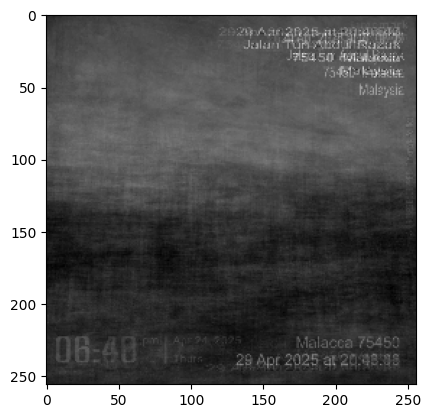

In [18]:
# find the mean image
mean_image = np.mean(X_train, axis=0)

# Convert the mean image to grayscale before reshaping
gray_mean_image = cv2.cvtColor((mean_image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

plt.imshow(gray_mean_image, cmap = plt.get_cmap("gray"))
plt.show()

# Feature Extraction - PCA

In [19]:
from sklearn.decomposition import PCA
n_components = 40

# Reshape the image data from 4D to 2D
# Each image is flattened into a single row of features (height * width * channels)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Fit PCA on the reshaped data
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train_reshaped)

# showing the mall name
mallname = pca.components_
image_grid(mallname[:,:],H,W, channels=3)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
# Reshape X_train to 2D before transforming
X_train_pca = pca.transform(X_train.reshape(X_train.shape[0], -1))

# Reshape X_test to 2D before transforming
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

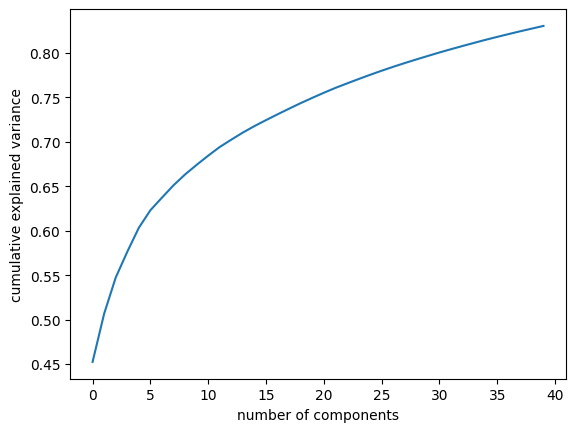

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [22]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45233658, 0.50656688, 0.54722892, 0.57628366, 0.60330423,
       0.62306706, 0.63725443, 0.6511482 , 0.66334694, 0.67416883,
       0.68449549, 0.69429129, 0.70253701, 0.71053478, 0.71780189,
       0.7245113 , 0.73105757, 0.73742474, 0.74365251, 0.74954239,
       0.75530458, 0.76076546, 0.76578265, 0.7707267 , 0.77550046,
       0.78012281, 0.78452839, 0.78876237, 0.7928179 , 0.79676548,
       0.80066792, 0.80435475, 0.80795836, 0.811481  , 0.81494374,
       0.81822744, 0.82142031, 0.82456815, 0.82756592, 0.83055866])

In [23]:
# calculate the distances
# class distance is deduct based on the 1st image, train - test
# power 2, to change all values to positive
# one class = one mall
# intra class is the same mall. thus, the distance should be smaller
intra_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[1,:]),2))

# intra class is for diff mall, the best is to have biggest distance
inter_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[6,:]),2))
print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))

Intra-class distance: 0
Inter-class distance: 66


FDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)

# Reshape the training data to 2D (samples, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Fit LDA on the reshaped training data
lda.fit(X_train_reshaped, y_train)

# Reshape the test data to 2D before transforming
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Transform both training and testing data
X_train_lda = lda.transform(X_train_reshaped)
X_test_lda = lda.transform(X_test_reshaped)

In [26]:
# intra class is the same person. thus, the distance should be smaller
intra_class_dist = np.sum(np.power((X_train_lda[1,:] - X_test_lda[1,:]),2))

# intra class is for diff person, the best is to have biggest distance
inter_class_dist = np.sum(np.power((X_train_lda[1,:] - X_test_lda[6,:]),2))

print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))

Intra-class distance: 0
Inter-class distance: 0


# KNN Implementation
- using the X_train_lda and X_test_lda

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [28]:
# Scale the LDA-transformed features
scaler = StandardScaler()
x_train_knn = scaler.fit_transform(X_train_lda)
x_test_knn = scaler.transform(X_test_lda)

# Convert labels to NumPy arrays
y_train_knn = np.array(train_df['mall_name'])
y_test_knn = np.array(test_df['mall_name'])

In [29]:
#instantiate KNN
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=3)

In [30]:
# predict the response
y_train_pred_knn = knn.predict(x_train_knn)
y_pred_knn = knn.predict(x_test_knn)
print("Test set prediction: \n {}".format(y_pred_knn))

Test set prediction: 
 ['Aeon Ayer Keroh' 'Mydin' 'Mydin' 'Aeon Ayer Keroh' 'Aeon Ayer Keroh'
 'Melaka Mall' 'Aeon Ayer Keroh' 'Mydin' 'Mydin' 'Aeon Ayer Keroh'
 'Melaka Mall' 'Mydin' 'Aeon Ayer Keroh' 'Melaka Mall' 'Mydin' 'Mydin'
 'Mydin' 'Melaka Mall' 'Mydin' 'Aeon Ayer Keroh' 'Mydin' 'Aeon Ayer Keroh'
 'Aeon Ayer Keroh' 'Mydin' 'Aeon Ayer Keroh' 'Aeon Ayer Keroh' 'Mydin'
 'Mydin' 'Aeon Ayer Keroh' 'Melaka Mall' 'Mydin' 'Aeon Ayer Keroh'
 'Aeon Ayer Keroh' 'Melaka Mall' 'Mydin' 'Aeon Ayer Keroh' 'Melaka Mall'
 'Aeon Ayer Keroh' 'Melaka Mall' 'Mydin' 'Mydin' 'Mydin' 'Mydin'
 'Aeon Ayer Keroh' 'Melaka Mall' 'Aeon Ayer Keroh' 'Aeon Ayer Keroh'
 'Melaka Mall' 'Melaka Mall' 'Aeon Ayer Keroh' 'Aeon Ayer Keroh'
 'Melaka Mall' 'Mydin' 'Mydin' 'Mydin' 'Mydin' 'Aeon Ayer Keroh'
 'Aeon Ayer Keroh' 'Aeon Ayer Keroh' 'Aeon Ayer Keroh' 'Aeon Ayer Keroh'
 'Aeon Ayer Keroh' 'Mydin' 'Aeon Ayer Keroh' 'Mydin' 'Mydin'
 'Aeon Ayer Keroh' 'Mydin' 'Melaka Mall' 'Aeon Ayer Keroh'
 'Aeon Ayer Keroh' 'Mydin

In [31]:
def evaluate_model(y_true, y_pred, label="Set"):
    print(f"{label} Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")

    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"{label} Precision: {precision * 100:.2f}%")
    print(f"{label} Recall: {recall * 100:.2f}%")
    print(f"{label} F1 Score: {f1 * 100:.2f}%\n")

    print(f"{label} Classification Report:")
    print(classification_report(y_true, y_pred))

    print(f"{label} Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [32]:
# Training prediction and evaluation
y_train_pred_knn = knn.predict(x_train_knn)
evaluate_model(y_train_knn, y_train_pred_knn, label="Training")

Training Accuracy: 86.09%
Training Precision: 84.90%
Training Recall: 82.81%
Training F1 Score: 83.61%

Training Classification Report:
                 precision    recall  f1-score   support

Aeon Ayer Keroh       0.86      0.93      0.90        61
    Melaka Mall       0.80      0.67      0.73        30
          Mydin       0.88      0.88      0.88        60

       accuracy                           0.86       151
      macro avg       0.85      0.83      0.84       151
   weighted avg       0.86      0.86      0.86       151

Training Confusion Matrix:
[[57  2  2]
 [ 5 20  5]
 [ 4  3 53]]


In [33]:
# Test prediction and evaluation
y_pred_knn = knn.predict(x_test_knn)
evaluate_model(y_test_knn, y_pred_knn, label="Test")

Test Accuracy: 35.64%
Test Precision: 30.72%
Test Recall: 31.26%
Test F1 Score: 30.88%

Test Classification Report:
                 precision    recall  f1-score   support

Aeon Ayer Keroh       0.43      0.49      0.45        41
    Melaka Mall       0.12      0.10      0.11        20
          Mydin       0.38      0.35      0.36        40

       accuracy                           0.36       101
      macro avg       0.31      0.31      0.31       101
   weighted avg       0.35      0.36      0.35       101

Test Confusion Matrix:
[[20  9 12]
 [ 7  2 11]
 [20  6 14]]


The model achieves high performance on the training set but did not perform well on the testing set. This suggest overfitting.

Hyperparameter Tuning

In [34]:
def tune_model(model, x_train, y_train, param_grid, scoring='accuracy', cv=5):
    gridSearch = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring=scoring, cv=cv, n_jobs=-1)
    gridSearch.fit(x_train, y_train)

    bestParameters = gridSearch.best_params_
    bestScore = gridSearch.best_score_

    print(f"Best parameters: {bestParameters}")
    print(f"Best cross-validation {scoring} score: {bestScore:.4f}\n")

    bestModel = gridSearch.best_estimator_
    return bestModel

In [35]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

best_knn_model = tune_model(knn, x_train_knn, y_train_knn, param_grid)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation accuracy score: 0.8338



In [36]:
# Train set evaluation
y_train_pred_best = best_knn_model.predict(x_train_knn)
evaluate_model(y_train_knn, y_train_pred_best, label="Training")

Training Accuracy: 84.77%
Training Precision: 83.27%
Training Recall: 83.96%
Training F1 Score: 83.58%

Training Classification Report:
                 precision    recall  f1-score   support

Aeon Ayer Keroh       0.87      0.87      0.87        61
    Melaka Mall       0.75      0.80      0.77        30
          Mydin       0.88      0.85      0.86        60

       accuracy                           0.85       151
      macro avg       0.83      0.84      0.84       151
   weighted avg       0.85      0.85      0.85       151

Training Confusion Matrix:
[[53  4  4]
 [ 3 24  3]
 [ 5  4 51]]


In [37]:
# Test set evaluation
y_test_pred_best = best_knn_model.predict(x_test_knn)
evaluate_model(y_test_knn, y_test_pred_best, label="Test")

Test Accuracy: 30.69%
Test Precision: 27.52%
Test Recall: 27.13%
Test F1 Score: 27.23%

Test Classification Report:
                 precision    recall  f1-score   support

Aeon Ayer Keroh       0.42      0.44      0.43        41
    Melaka Mall       0.08      0.10      0.09        20
          Mydin       0.32      0.28      0.30        40

       accuracy                           0.31       101
      macro avg       0.28      0.27      0.27       101
   weighted avg       0.31      0.31      0.31       101

Test Confusion Matrix:
[[18 12 11]
 [ 6  2 12]
 [19 10 11]]


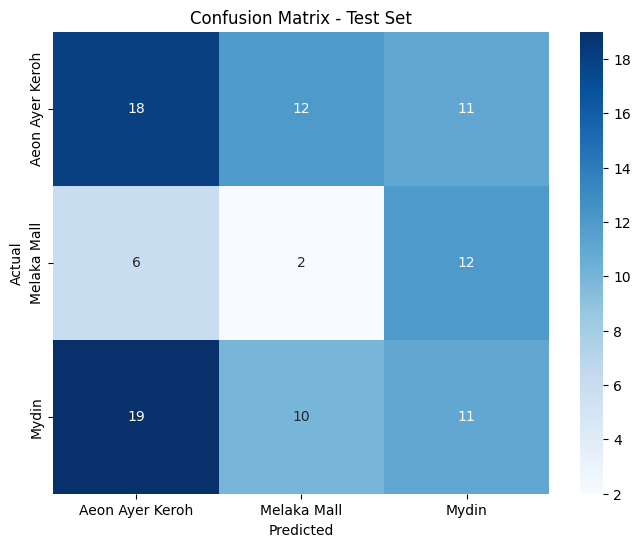

In [38]:
cm = confusion_matrix(y_test_knn, y_test_pred_best)
plt.figure(figsize=(8, 6))
# Use the values from the all_mappings dictionary to get the class names for the labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(all_mappings['mall_name'].values()), yticklabels=list(all_mappings['mall_name'].values()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

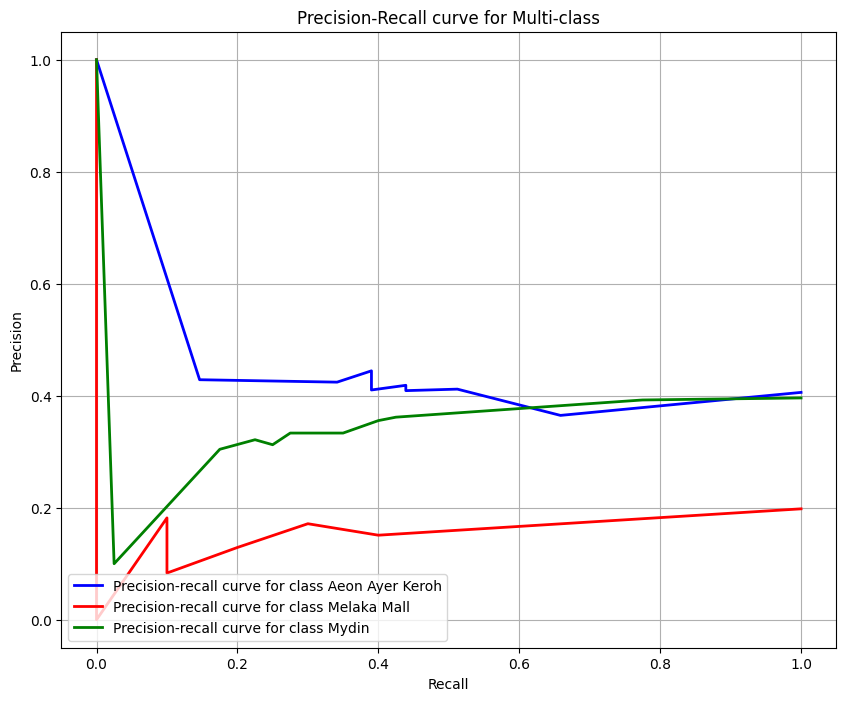

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the output for plotting per-class curves
y_test_bin = label_binarize(y_test_knn, classes=le.classes_)

# Get the probability estimates for the positive class
# If the model doesn't have predict_proba, this approach needs adjustment
# For KNN, predict_proba provides class probabilities
y_score = best_knn_model.predict_proba(x_test_knn)

# Plot Precision-Recall curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green'] # Define colors for each class

for i, class_name in enumerate(all_mappings['mall_name'].values()):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, color=colors[i], lw=2,
             label=f'Precision-recall curve for class {class_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Multi-class')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


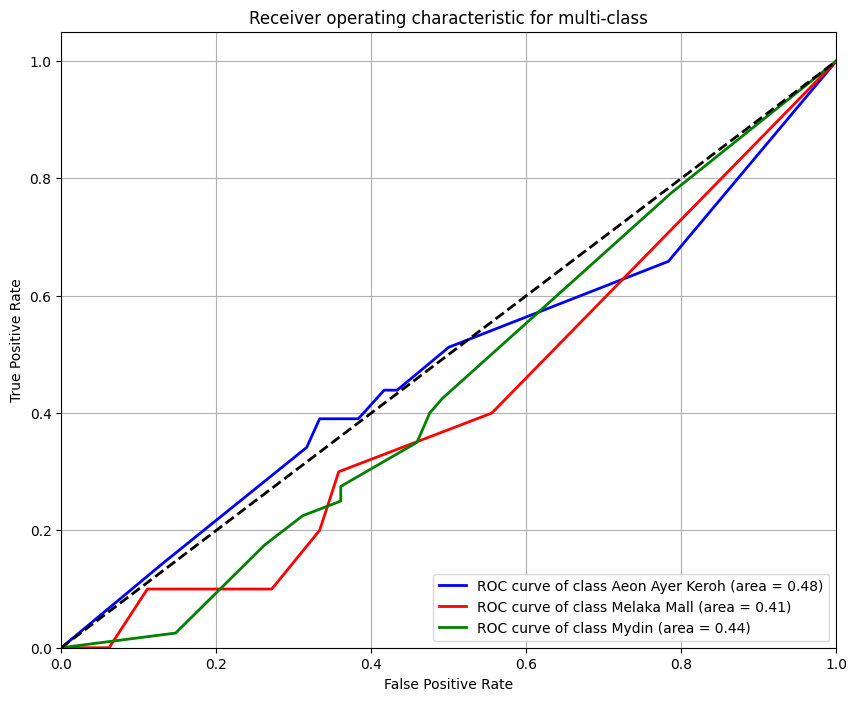

In [40]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output for plotting per-class curves for ROC
y_test_bin = label_binarize(y_test_knn, classes=le.classes_)
n_classes = y_test_bin.shape[1]

# Get the probability estimates for the positive class
y_score = best_knn_model.predict_proba(x_test_knn)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'darkorange', 'cornflowerblue']) # Define colors for each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# SVM Implementation
- using the X_train_pca and X_test_pca

In [41]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, average_precision_score, precision_recall_curve

In [42]:
x_train = np.array(X_train_lda)
y_train = np.array(train_df['mall_name'])
x_test = np.array(X_test_lda)
y_test = np.array(test_df['mall_name'])

### Model Training

In [43]:
clf = svm.SVC(kernel='linear', gamma='auto')
clf.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [44]:
y_train_pred = clf.predict(x_train)

# Calculate the performance of the model

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {accuracy_train * 100:.2f}%')

precision_train = precision_score(y_train, y_train_pred, average='macro')
print(f'Precision: {precision_train* 100:.2f}%')

recall_train = recall_score(y_train, y_train_pred, average='macro')
print(f'Recall: {recall_train* 100:.2f}%')

f1_train = f1_score(y_train, y_train_pred, average='macro')
print(f'F1 Score: {f1_train* 100:.2f}%\n')

# Display the full classification report

print(classification_report(y_train, y_train_pred))

Training Accuracy: 83.44%
Precision: 81.90%
Recall: 81.17%
F1 Score: 81.50%

                 precision    recall  f1-score   support

Aeon Ayer Keroh       0.86      0.89      0.87        61
    Melaka Mall       0.75      0.70      0.72        30
          Mydin       0.85      0.85      0.85        60

       accuracy                           0.83       151
      macro avg       0.82      0.81      0.82       151
   weighted avg       0.83      0.83      0.83       151



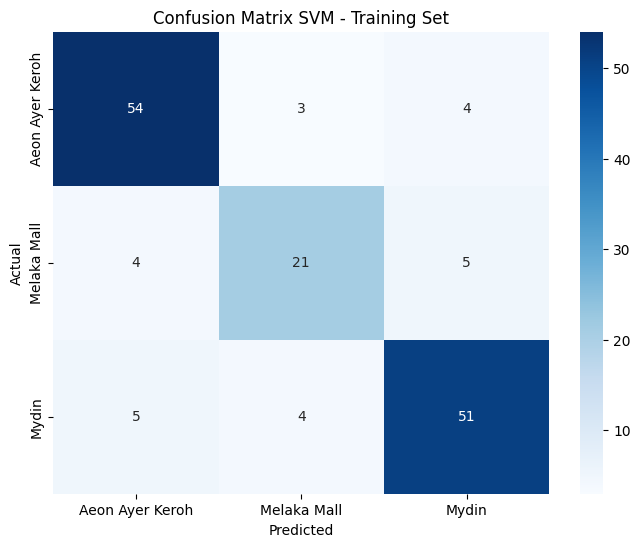

In [45]:
# Plot the confusion matrix

conf_matrix_clf = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_clf, annot=True, fmt='d', cmap='Blues', xticklabels=list(all_mappings['mall_name'].values()), yticklabels=list(all_mappings['mall_name'].values()))

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM - Training Set')
plt.show()

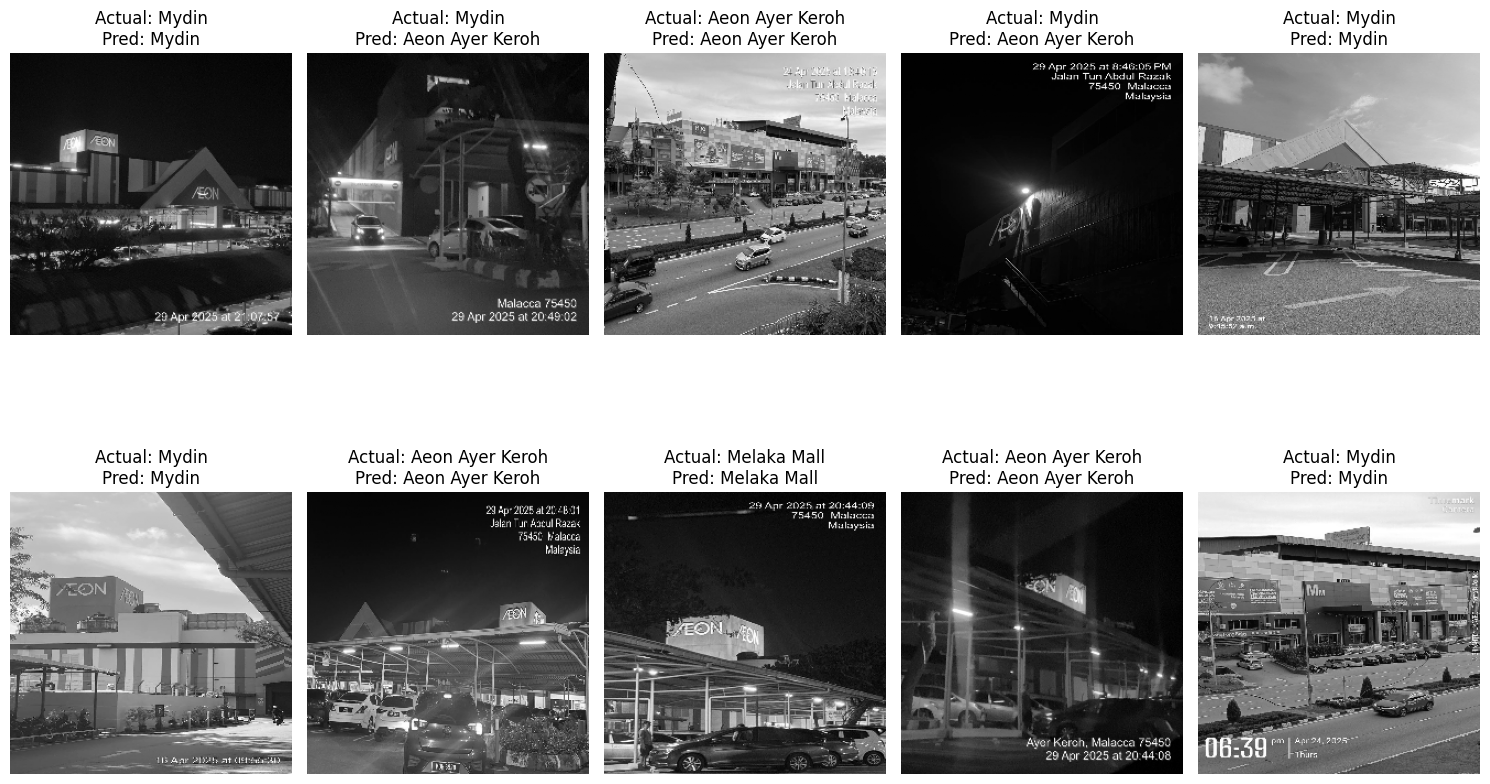

In [46]:
# Display some test images with predictions and actual labels
num_images_to_display = 10

plt.figure(figsize=(15, 10))

# Get a few indices from the test set to display
display_indices = np.random.choice(len(X_train), num_images_to_display, replace=False)

for i, idx in enumerate(display_indices):
    plt.subplot(2, 5, i + 1)  # Adjust subplot grid based on num_images_to_display

    # Get the preprocessed image data
    img_data = X_train[idx]

    # Convert the color image to grayscale and then to uint8 for display
    gray_image = cv2.cvtColor((img_data * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    plt.imshow(gray_image, cmap='gray')
    plt.title(f"Actual: {y_train[idx]}\nPred: {y_train_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [48]:
# Tune the parameters of the model and find the best model using Grid Search

def tune_model(model, x_train, y_train, param_grid, scoring='accuracy', cv=5):
    gridSearch = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring=scoring, cv=cv)

    gridSearch.fit(x_train, y_train)

    bestParameters = gridSearch.best_params_
    bestScore = gridSearch.best_score_

    print(f"Best parameters: {bestParameters}\n")
    print(f"Best {scoring} score: {bestScore}")

    bestModel = gridSearch.best_estimator_
    return bestModel

In [49]:
# Validate the model performance using cross validation method with num of folds = 5

def cross_validation(model, X_train, y_train, scoring='accuracy', cv=5):
    result = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)

    print(f"\nCross Validation Scores ({scoring}): {result}")
    print(f"\nMean Accuracy      : {result.mean() * 100:.2f}%")
    print(f"Standard Deviation : {result.std():.2f}")

In [50]:
# Define the parameters for SVM tuning

svm_param= {
    'C': [0.1, 1, 10]
    }

svm_tuned = tune_model(svm.SVC(kernel='linear', gamma='auto'), x_train, y_train, svm_param, scoring='accuracy')
y_train_pred = svm_tuned.predict(x_train)

Best parameters: {'C': 1}

Best accuracy score: 0.8204301075268818


In [51]:
# Validate the model performance
cross_validation(svm_tuned, x_train, y_train, scoring='accuracy', cv=5)


Cross Validation Scores (accuracy): [0.93548387 0.86666667 0.5        0.9        0.9       ]

Mean Accuracy      : 82.04%
Standard Deviation : 0.16


### Re-evalute the Training Set

In [52]:
# Using the best model
y_train_pred = svm_tuned.predict(x_train)

# Calculate the performance of the model

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {accuracy_train * 100:.2f}%')

precision_train = precision_score(y_train, y_train_pred, average='macro')
print(f'Precision: {precision_train* 100:.2f}%')

recall_train = recall_score(y_train, y_train_pred, average='macro')
print(f'Recall: {recall_train* 100:.2f}%')

f1_train = f1_score(y_train, y_train_pred, average='macro')
print(f'F1 Score: {f1_train* 100:.2f}%\n')

# Display the full classification report

print(classification_report(y_train, y_train_pred))

Training Accuracy: 83.44%
Precision: 81.90%
Recall: 81.17%
F1 Score: 81.50%

                 precision    recall  f1-score   support

Aeon Ayer Keroh       0.86      0.89      0.87        61
    Melaka Mall       0.75      0.70      0.72        30
          Mydin       0.85      0.85      0.85        60

       accuracy                           0.83       151
      macro avg       0.82      0.81      0.82       151
   weighted avg       0.83      0.83      0.83       151



### Model Testing

In [53]:
# Evaluate the test set using tuned model

y_test_pred = svm_tuned.predict(x_test)

# Calculate the performance of the model

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {accuracy_test * 100:.2f}%')

precision_test = precision_score(y_test, y_test_pred, average='macro')
print(f'Precision: {precision_train* 100:.2f}%')

recall_test = recall_score(y_test, y_test_pred, average='macro')
print(f'Recall: {recall_test* 100:.2f}%')

f1_train = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Score: {f1_train* 100:.2f}%\n')

# Display the full classification report

print(classification_report(y_test, y_test_pred))

Testing Accuracy: 30.69%
Precision: 81.90%
Recall: 27.13%
F1 Score: 27.07%

                 precision    recall  f1-score   support

Aeon Ayer Keroh       0.41      0.44      0.42        41
    Melaka Mall       0.09      0.10      0.10        20
          Mydin       0.31      0.28      0.29        40

       accuracy                           0.31       101
      macro avg       0.27      0.27      0.27       101
   weighted avg       0.31      0.31      0.31       101



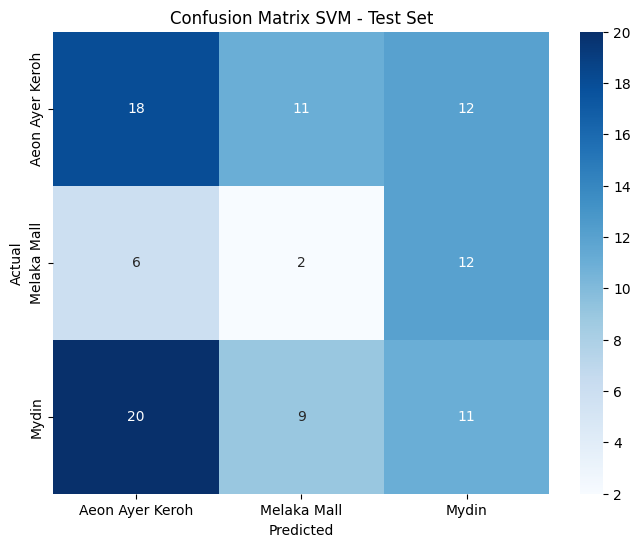

In [54]:
# Plot the confusion matrix

conf_matrix_clf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
# Use the correct LabelEncoder instance 'le' to get the class names
sns.heatmap(conf_matrix_clf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM - Test Set')
plt.show()

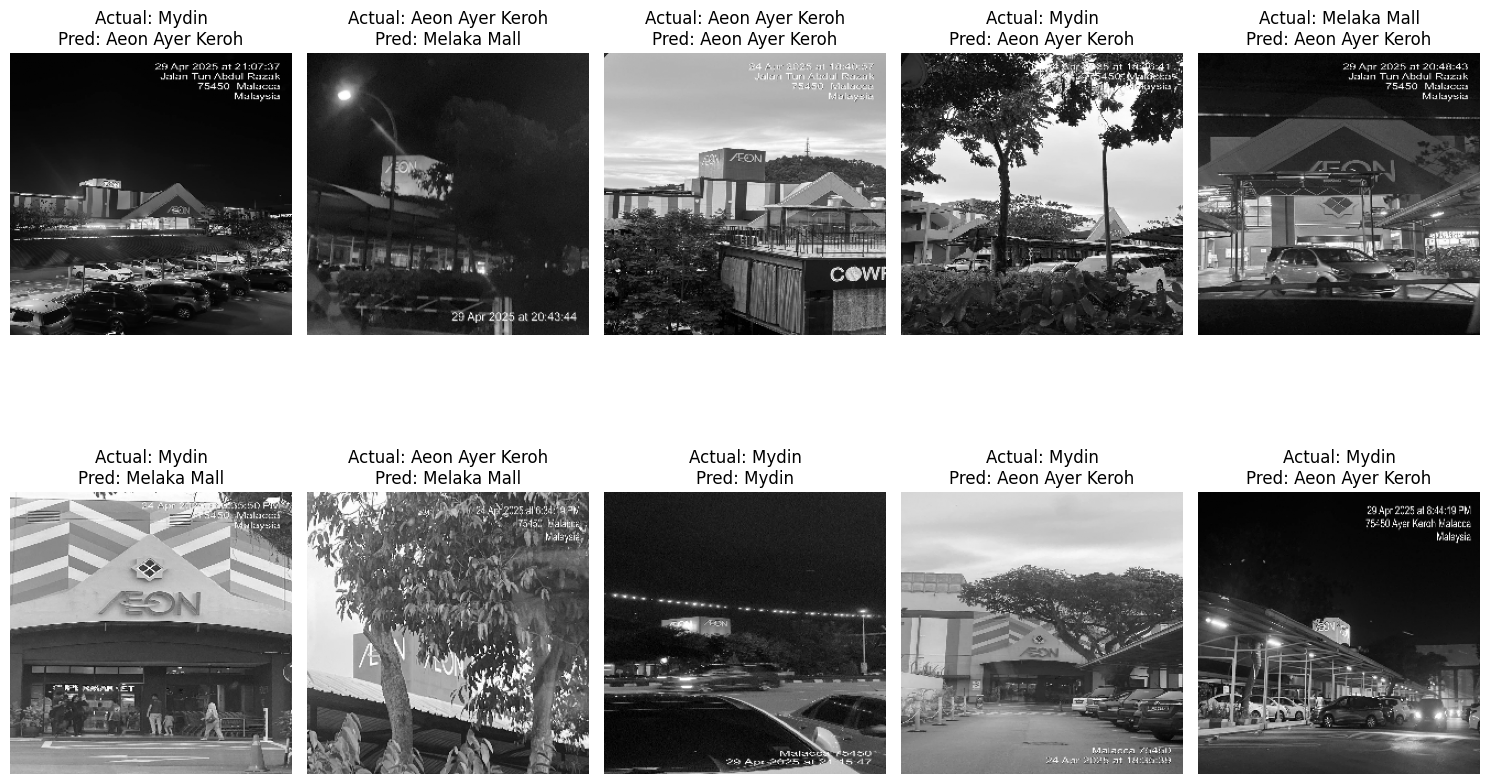

In [55]:
# Display some test images with predictions and actual labels
num_images_to_display = 10

plt.figure(figsize=(15, 10))

# Get a few indices from the test set to display
display_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

for i, idx in enumerate(display_indices):
    plt.subplot(2, 5, i + 1)  # Adjust subplot grid based on num_images_to_display

    # Get the preprocessed image data
    img_data = X_test[idx]

    # Convert the color image to grayscale and then to uint8 for display
    gray_image = cv2.cvtColor((img_data * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    plt.imshow(gray_image, cmap='gray')
    plt.title(f"Actual: {y_test[idx]}\nPred: {y_test_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Precision-Recall Curve

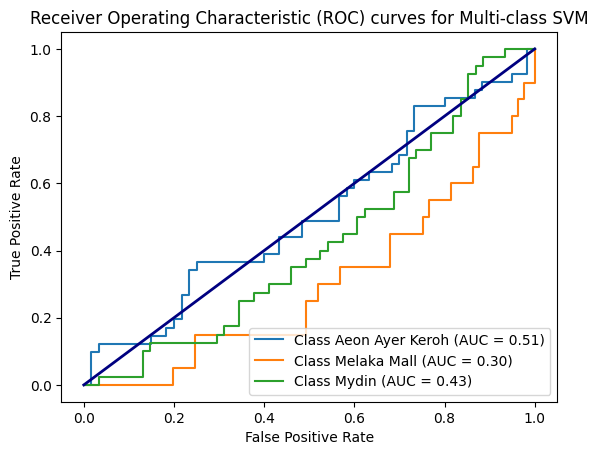

In [56]:
y_score = svm_tuned.decision_function(x_test)

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})') # Changed label_encoders to le

plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves for Multi-class SVM') # Corrected the title slightly
plt.legend(loc="lower right")
plt.show()

### Receiver Operating Characteristic (ROC) curves

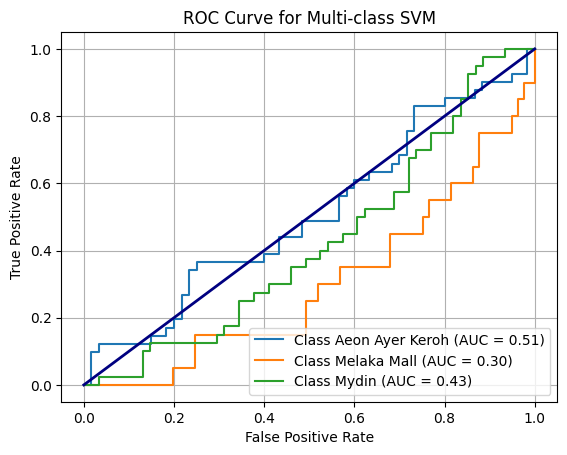

In [57]:
y_score = svm_tuned.decision_function(x_test)

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    # Use the 'le' LabelEncoder instance to get the class names
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class SVM')
plt.legend(loc="lower right")
plt.grid(True) # Added grid for better readability
plt.show()